# Text Analytics
In text analytics, we will be converting Unstructed data to structured data.
After converting the Unstructed data to structured data, we will predict the ticket category using Random Forest classification method.
## Basic feature extraction using text data<br>

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
#!pip install textblob
from textblob import TextBlob
from textblob import Word
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix

In [55]:
#Read the ticket from CSV files
tickets = pd.read_csv('ICMTickets.csv', encoding = "ISO-8859-1")
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13459 entries, 0 to 13458
Data columns (total 3 columns):
IncidentId       13459 non-null int64
Title            13459 non-null object
ComponentName    13459 non-null object
dtypes: int64(1), object(2)
memory usage: 315.5+ KB


In [70]:
# Let's check how many words are present in each ticket
tickets['word_count'] = tickets['Title'].apply(lambda x: len(str(x).split()))
print(tickets['word_count'].mean())
stop = stopwords.words('english') # Create stop words
#print(stop)
tickets['stopwords'] = tickets['Title'].apply(lambda x: len([x for x in x.split() if x in stop]))
tickets.head()

11.135002600490377


,IncidentId,Title,ComponentName,word_count,stopwords
0,102933628,Server:BN1DA101 Event2003.HP Sensor.A temperat...,Event Monitoring Alerts,39,13
1,91337227,Server:BN1DA114 Event2003.HP Sensor.A temperat...,Event Monitoring Alerts,39,13
2,71375266,Server:BN1DA282 Event103.HP Smart Array;Desc:A...,Event Monitoring Alerts,81,25
3,69122680,Server:BN1DA282 Event2003.HP Sensor.A temperat...,Event Monitoring Alerts,39,13
4,68964337,Server:IEBRBI-DATAVIZ3 Event2003.HP Sensor.A t...,Event Monitoring Alerts,39,13


## Basic Text Pre-processing of text data
Lower casing<br>
Punctuation removal<br>
Stopwords removal<br>
Frequent words removal<br>
Rare words removal<br>
Spelling correction<br>
Tokenization<br>
Stemming<br>
Lemmatization<br>

In [75]:
#tickets.drop(['word_count','stopwords'], axis=1, inplace=True)

tickets['Title'] = tickets['Title'].apply(lambda x: " ".join(x.lower() for x in x.split())) # Converting Lower case
tickets['Title'] = tickets['Title'].str.replace('[^\w\s]',' ').str.replace('_',' ') # Removing Punctuation
tickets['Title'] = tickets['Title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) # Removal of Stop Words
# Removal of numbers
tickets['Title'] = tickets['Title'].str.replace('[0-9]','') # Remove numbers
tickets.head()

,IncidentId,Title,ComponentName,word_count,stopwords
0,102933628,server bnda event hp sensor temperature sensor...,Event Monitoring Alerts,39,13
1,91337227,server bnda event hp sensor temperature sensor...,Event Monitoring Alerts,39,13
2,71375266,server bnda event hp smart array desc logical ...,Event Monitoring Alerts,81,25
3,69122680,server bnda event hp sensor temperature sensor...,Event Monitoring Alerts,39,13
4,68964337,server iebrbi dataviz event hp sensor temperat...,Event Monitoring Alerts,39,13


In [238]:
# Tokenization refers to dividing the text into a sequence of words or sentences.
#print(TextBlob(tickets['Title'][1]).words)
#Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. 
#st = PorterStemmer()
#tickets['Title']=tickets['Title'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [76]:
# Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.
tickets['Title']=tickets['Title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
#Converting to Bag of words/Document term matrix
bow = CountVectorizer(min_df=135) # Converting to matrix
tickets_bow = bow.fit_transform(tickets['Title'])
tickets_bow

<13459x111 sparse matrix of type '<class 'numpy.int64'>'
	with 95578 stored elements in Compressed Sparse Row format>

In [77]:
tickets_dtm=pd.DataFrame(bow.fit_transform(tickets['Title']).toarray(), columns=bow.get_feature_names()) # 
tickets_dtm[:].sum()

access                  639
accountclose            143
agent                  3991
alert                  1014
applicationevents       184
apps                    688
asp                     686
available               729
azcdnangpcorp          2635
azmsadevtabib           148
azpcddadevsql           138
azpcddarptsql           272
azpcddatstsql           378
azpcdmapp               193
azpeunrtoweb            158
azpmdsrre               316
azpmsacrmcdsp           138
azpmsaosd               231
azpmsaprodtab           158
azpmsaweb               148
azpmsetl                171
azpmsu                  205
azpuswcrtoweb           379
azwindcubeprd           138
azwindsqd               179
azwindsqp               198
ba                      173
bnda                   1105
byte                    402
cdna                   2805
                       ... 
privacy                2511
prod                   1330
read                    155
registration            150
request             

# Let's build a model using Random Forest

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [242]:
# Putting feature variable to X
X = tickets_dtm.copy()

# Putting response variable to y
y = tickets['ComponentName']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=234)

In [243]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [244]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [245]:
# Making predictions
predictions = rfc.predict(X_test)

In [246]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [247]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

                         precision    recall  f1-score   support

    Asp.Net Apps alerts       1.00      1.00      1.00       203
            Cube Issues       0.40      0.21      0.28        19
      Disk Space alerts       0.99      1.00      1.00       662
Event Monitoring Alerts       0.86      0.85      0.85       175
       Incident Request       0.00      0.00      0.00         0
        Infra Incidents       0.76      0.81      0.78        31
      Infra Maintenance       1.00      0.99      0.99        88
         Infra Requests       0.85      0.93      0.89       113
             NGP Cosmos       0.98      0.82      0.89       110
                NGP SQL       0.88      0.98      0.93       310
                OPG/EGW       0.82      0.72      0.77        25
                 Others       1.00      0.25      0.40        12
     Performance Alerts       0.99      1.00      0.99       834
          SQL Incidents       0.91      0.94      0.92       122
        SQL Maintenance 

In [248]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[ 202    0    1    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    4    0   11    0    0    0    1    0    0    0    0    0    3
     0    0    0    0    0    0    0    0    0    0]
 [   0    0  661    0    0    0    0    0    0    0    0    0    1    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    6    0  148    0    0    0    0    0   11    0    0    3    0
     0    0    0    1    0    0    6    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    2    1   25    0    1    0    0    1    0    0    0
     0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    1    0    0   87    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  105    0    0    0    0    1    0
     0    6    0    0    1    0    0    0    0    0]


In [249]:
print(accuracy_score(y_test,predictions))

0.9581475978207034


In [250]:
# Create the parameter grid based on the results of random search 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 25, 50, 100, 200, 300], 
    'max_features': [3, 5, 10, 15, 20,25,30,35,40,45,50]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [251]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 66 candidates, totalling 198 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 198 out of 198 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 25, 50, 100, 200, 300], 'max_features': [3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [252]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9556310370448997 using {'max_features': 20, 'n_estimators': 25}


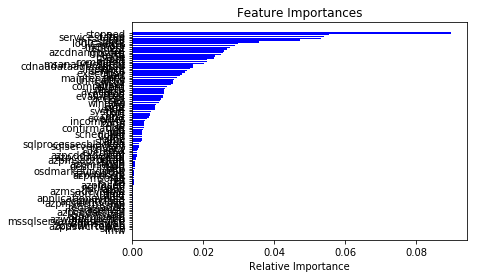

In [295]:
# To find which words(features) are impoerant
features = X_train.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()